# Select labels based on their size
After an image has been segmented and objects are labeled, we may want to remove objects that are either to small or to large to be considered as objects, _nuclei_ for example. 

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread
import matplotlib
import numpy as np
import stackview

# initialize GPU
cle.select_device("GTX")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with GTX in their name. Using gfx1035 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<gfx1035 on Platform: AMD Accelerated Parallel Processing (2 refs)>

We start from a labeled version of the blobs image.

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
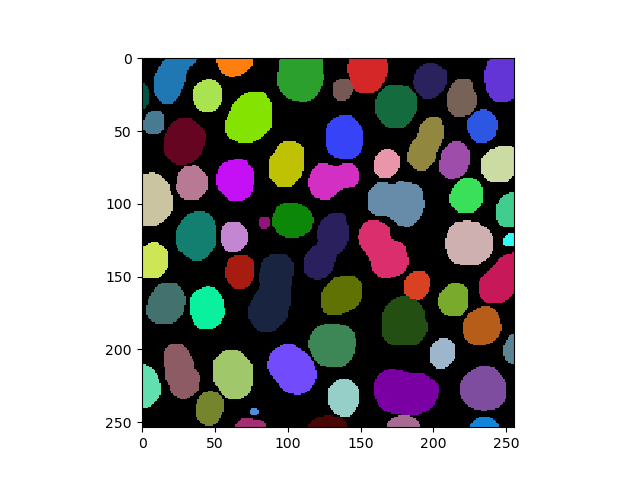

In [2]:
# load data
label_image = imread('../../data/blobs_labeled.tif')

stackview.insight(label_image)

Let's assume we're not interested in the very small objects as they might be result of a false segmentation of some noise. We do know that the objects we imaged have a certain minimum size. From this physical guess, we need to estimate a number of pixels (in 2D) or voxels (in 3D) object are large. We can then use this number as `size_threshold` in pixels or voxels.

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
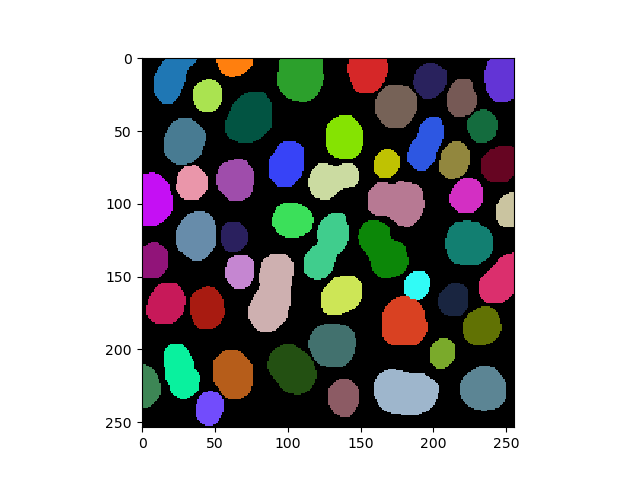

In [3]:
size_threshold = 200 # pixels

large_labels_only = cle.exclude_small_labels(label_image, maximum_size=size_threshold)

large_labels_only

We can use a similar function to visualize the objects that have been removed above in a separate label image.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
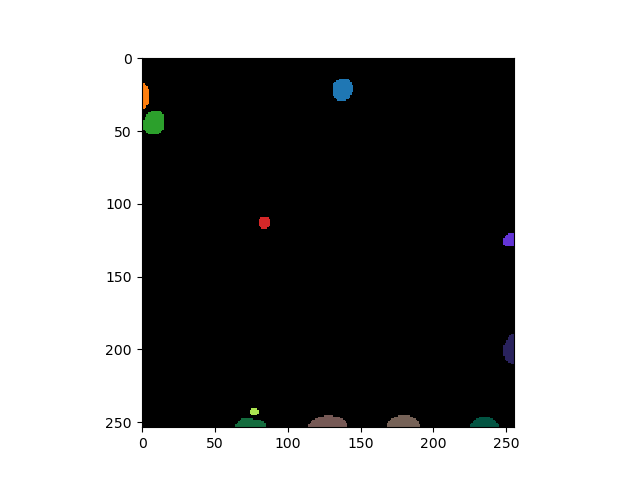

In [4]:
small_labels_only = cle.exclude_large_labels(label_image, minimum_size=size_threshold)

small_labels_only